<a href="https://colab.research.google.com/github/yh08037/Introduction-to-Intelligent-Systems/blob/master/HW4_save.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feedback Neural Network (FBNN)
a.k.a. Recurrent Neural Network (RNN)

## 1. Generating input data X
Generate some input data (X) consisting of 30 sequences of 8 binary numbers, following a uniform distribution, where the probability of generating a “0” is the same as that of generating a “1”. Make the output (y) for each sequence be the sum of its elements.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random


I = 30  # number of traing data
T = 8   # size of binary numbers


# Generate training data randomly

x = np.hstack((np.zeros((I, 1)), np.random.randint(2, size=(I, T))))  # x0 is not used but for simplicity of code
y = x.sum(axis=1)

## 2. Implementing sequentail adder using Elman RNN
Implement a sequential adder using the Elman recurrent neural network (RNN) with

a) backpropagation

b) resilient propagation

c) gradient clipping.

In [0]:
def SSE(yh, y):
    if yh.size != y.size :
        print("Invalid arguments for SEE")
        exit()
    result = 0.
    for i in range(yh.size):
        result += (yh[i] - y[i]) ** 2
    return result / 2.

In [0]:
# initialize f0
f = np.ones((I, T+1))


# define hyperparameters

alpha1 = 0.0001
alpha2 = 0.0001

delta_x = 0.001
delta_f = 0.001

eta_p = 1.2
eta_n = 0.5

eta = 1000

epsilon = 0.0001


# define parameters by random

vx_rand = random.uniform(0, 2)
vf_rand = random.uniform(0, 1)


# initialize list Vx, Vf for plot

Vx_bp = []
Vf_bp = []

Vx_rp = []
Vf_rp = []

Vx_gc = []
Vf_gc = []


### a) Standard Back Propagation

iteration 0
vf : 0.7635686658580072
vx : 1.9723522066689048
error : 11.34500452670142

iteration 10
vf : 0.7806700074079947
vx : 1.96081257846124
error : 9.35976008164315

iteration 20
vf : 0.7828877315953142
vx : 1.946988646569349
error : 9.16347148786374

iteration 30
vf : 0.7850827050981952
vx : 1.9332899567298574
error : 8.970733045113647

iteration 40
vf : 0.7872626513800997
vx : 1.9197179144395422
error : 8.7815162143666

iteration 50
vf : 0.789427470328659
vx : 1.9062726612893057
error : 8.595792744008786

iteration 60
vf : 0.7915770595369166
vx : 1.8929543238035529
error : 8.41353387439592

iteration 70
vf : 0.7937113174740094
vx : 1.8797630133073286
error : 8.234710335565223

iteration 80
vf : 0.7958301436171494
vx : 1.8666988253327075
error : 8.059292346461483

iteration 90
vf : 0.7979334385820335
vx : 1.8537618390513197
error : 7.887249615657869

iteration 100
vf : 0.8000211042525592
vx : 1.8409521167338108
error : 7.718551343543146

iteration 110
vf : 0.8020930439096534
vx 

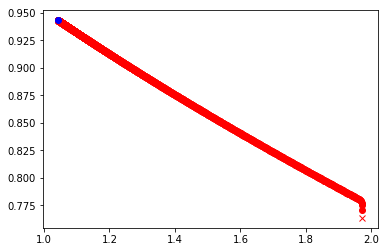

In [141]:
# Main loop for training

vx = vx_rand
vf = vf_rand

cnt = 0
E_present = 0.
E_previous = 0.

while cnt < 1 or abs(E_present - E_previous) > epsilon:

    # forward propagation

    for t in range(1, T+1):
        for i in range(0, I):
            f[i, t] = vf * f[i, t-1] + vx * x[i, t]

    y_hat = f[:, T]

    # back propagation
    
    for t in range(1, T+1):
        for i in range(0, I):
            vx -= alpha1 * (y_hat[i] - y[i]) * (vf ** (T-t)) * x[i, t]

    sum_T = 0.
    for t in range(1, T+1):
        sum_I = 0.
        for i in range(0, I):
            sum_I += (y_hat[i] - y[i]) * f[i, t-1]
        sum_T += sum_I * (vf ** (T-t))
    vf -= alpha2 * sum_T

    E_previous = E_present
    E_present = SSE(y_hat, y)
    
    Vx_bp.append(vx)
    Vf_bp.append(vf)
    
    if cnt % 10 == 0:
        print('iteration', cnt)
        print('vf :', vf)
        print('vx :', vx)
        print('error :', E_present)
        print()
    if cnt == 0:
        plt.plot(vx, vf, 'rx')
    else:
        plt.plot(vx, vf, 'ro')

    cnt += 1
plt.plot(vx, vf, 'bo')
plt.show()

### b) Resilient Propagation

iteration 0
vf : 0.7522225741120666
vx : 1.9727303823506521
error : 11.34500452670142

iteration 10
vf : 0.7833729926464666
vx : 1.9724017612946523
error : 9.549340470903104

iteration 20
vf : 0.7855756657283169
vx : 1.8920371025394656
error : 8.670950065770567

iteration 30
vf : 0.8114349554911517
vx : 1.7440775214523867
error : 6.694671042587048

iteration 40
vf : 0.8346926866636789
vx : 1.6102489757554332
error : 5.184941185291581

iteration 50
vf : 0.8556269326426404
vx : 1.4663894131254591
error : 3.894215130737687

iteration 60
vf : 0.8714515001369196
vx : 1.4033541534792529
error : 3.1740503721960995

iteration 70
vf : 0.8834764968011479
vx : 1.3452979651790529
error : 2.723611600885925

iteration 80
vf : 0.8943727468114724
vx : 1.2929931526450547
error : 2.3690166478077352

iteration 90
vf : 0.9042671889774134
vx : 1.2458180317393375
error : 2.097547751133989

iteration 100
vf : 0.9091396174667388
vx : 1.2099699321479338
error : 1.9269384175173048

iteration 110
vf : 0.91474718

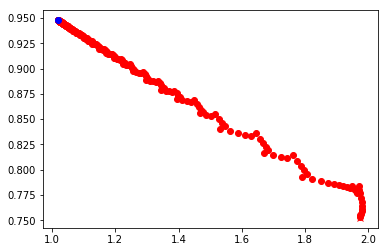

In [142]:
# Main loop for training

vx = vx_rand
vf = vf_rand

cnt = 0
E_present = 0.
E_previous = 0.

gradx_present = 0.
gradx_previous = 0.

gradf_present = 0.
gradf_previous = 0.

while cnt < 1 or abs(E_present - E_previous) > epsilon:

    # forward propagation

    for t in range(1, T+1):
        for i in range(0, I):
            f[i, t] = vf * f[i, t-1] + vx * x[i, t]

    y_hat = f[:, T]

    
    # resilient propagation
    
    gradx_previous = gradx_present
    gradf_previous = gradf_present
    
    gradx_present = 0.
    for t in range(1, T+1):
        tmp = 0.
        for i in range(0, I):
            tmp += (y_hat[i] - y[i]) * x[i, t]
        gradx_present += tmp * (vf ** (T-t))
    
    gradf_present = 0.
    for t in range(1, T+1):
        tmp = 0.
        for i in range(0, I):
            tmp += (y_hat[i] - y[i]) * f[i, t-1]
        gradf_present += tmp * (vf ** (T-t))
    
    
    if cnt >= 1:
        if np.sign(gradx_previous) == np.sign(gradx_present):
            delta_x *= eta_p
        else:
            delta_x *= eta_n
    
    if cnt >= 1:
        if np.sign(gradf_previous) == np.sign(gradf_present):
            delta_f *= eta_p
        else:
            delta_f *= eta_n

    vx -= np.sign(gradx_present) * delta_x
    vf -= np.sign(gradf_present) * delta_f
    
    
    E_previous = E_present
    E_present = SSE(y_hat, y)
    
    Vx_rp.append(vx)
    Vf_rp.append(vf)
    
    
    if cnt % 10 == 0:
        print('iteration', cnt)
        print('vf :', vf)
        print('vx :', vx)
        print('error :', E_present)
        print()
    if cnt == 0: 
        plt.plot(vx, vf, 'rx')
    else: 
        plt.plot(vx, vf, 'ro')

    cnt += 1

plt.plot(vx, vf, 'bo')
plt.show()

### c) Gradient clipping

iteration 0
vf : 0.7635686658580072
vx : 1.972352206668904
error : 11.34500452670142

iteration 10
vf : 0.7806700074079949
vx : 1.9608125784612416
error : 9.359760081643147

iteration 20
vf : 0.7828877315953137
vx : 1.9469886465693524
error : 9.163471487863788

iteration 30
vf : 0.7850827050981946
vx : 1.9332899567298627
error : 8.970733045113708

iteration 40
vf : 0.7872626513800989
vx : 1.9197179144395475
error : 8.781516214366675

iteration 50
vf : 0.7894274703286583
vx : 1.9062726612893088
error : 8.595792744008843

iteration 60
vf : 0.7915770595369161
vx : 1.8929543238035549
error : 8.41353387439595

iteration 70
vf : 0.7937113174740086
vx : 1.8797630133073358
error : 8.234710335565302

iteration 80
vf : 0.795830143617148
vx : 1.8666988253327166
error : 8.059292346461596

iteration 90
vf : 0.7979334385820316
vx : 1.8537618390513328
error : 7.887249615658039

iteration 100
vf : 0.8000211042525575
vx : 1.8409521167338225
error : 7.718551343543288

iteration 110
vf : 0.80209304390965

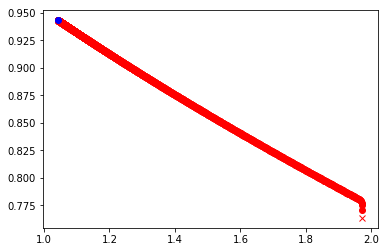

In [143]:
# Main loop for training

vx = vx_rand
vf = vf_rand

cnt = 0
E_present = 0.
E_previous = 0.

gradx = 0.
gradf = 0.

while cnt < 1 or abs(E_present - E_previous) > epsilon:

    # forward propagation

    for t in range(1, T+1):
        for i in range(0, I):
            f[i, t] = vf * f[i, t-1] + vx * x[i, t]

    y_hat = f[:, T]

    
    # back propagation with gradient clipping
    
    gradx = 0.
    for t in range(1, T+1):
        tmp = 0.
        for i in range(0, I):
            tmp += (y_hat[i] - y[i]) * x[i, t]
        gradx += tmp * (vf ** (T-t))
    
    gradf = 0.
    for t in range(1, T+1):
        tmp = 0.
        for i in range(0, I):
            tmp += (y_hat[i] - y[i]) * f[i, t-1]
        gradf += tmp * (vf ** (T-t))
    
    if gradx > eta:
        gradx *= eta / abs(gradx)
    if gradf > eta:
        gradf *= eta / abs(gradf)
    
    vx -= alpha1 * gradx
    vf -= alpha2 * gradf    
    
    E_previous = E_present
    E_present = SSE(y_hat, y)
    
    Vx_gc.append(vx)
    Vf_gc.append(vf)
    
    
    if cnt % 10 == 0:
        print('iteration', cnt)
        print('vf :', vf)
        print('vx :', vx)
        print('error :', E_present)
        print()
    if cnt == 0: 
        plt.plot(vx, vf, 'rx')
    else: 
        plt.plot(vx, vf, 'ro')

    cnt += 1
    
plt.plot(vx, vf, 'bo')
plt.show()

## 3. Show the results of model (Plot Vx, Vf)
Show the results by comparing the outputs of your model to the actual output values for all three methods (backpropagation, resilient propagation and gradient clipping).

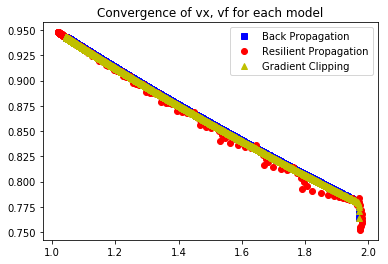


models			| vx*		| vf*		| iteration
-----------------------------------------------------------------------
Back Propagation	| 1.043315	| 0.943090	| 1599
Resilient Propagation	| 1.018989	| 0.947859	| 264
Gradient Clipping	| 1.043315	| 0.943090	| 1599


In [144]:
plt.plot(Vx_bp, Vf_bp, 'bs', label='Back Propagation')
plt.plot(Vx_rp, Vf_rp, 'ro', label='Resilient Propagation')
plt.plot(Vx_gc, Vf_gc, 'y^', label='Gradient Clipping')

plt.title('Convergence of vx, vf for each model')
plt.legend()
plt.show()

print()
print('models\t\t\t| vx*\t\t| vf*\t\t| iteration')
print('-----------------------------------------------------------------------')
print('Back Propagation\t| %.6f\t| %.6f\t| %d' %(Vx_bp[-1], Vf_bp[-1], len(Vx_bp)))
print('Resilient Propagation\t| %.6f\t| %.6f\t| %d'%(Vx_rp[-1], Vf_rp[-1], len(Vx_rp)))
print('Gradient Clipping\t| %.6f\t| %.6f\t| %d' %(Vx_gc[-1], Vf_gc[-1], len(Vx_gc)))